In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.loadtxt("51Peg_mayorqueloz95.csv", delimiter=",", skiprows=1)

array([[  2.80873, -46.96   ,   3.6    ],
       [  2.95979, -47.39   ,   4.5    ],
       [  3.62695, -19.85   ,   2.9    ],
       [  3.73265, -13.47   ,   2.6    ],
       [  3.90077,  -5.782  ,   3.     ],
       [  4.60753,  49.41   ,   2.2    ],
       [  4.78429,  58.66   ,   2.5    ],
       [  4.90699,  63.2    ,   3.2    ],
       [  5.60503,  45.6    ,   2.7    ],
       [  5.92544,  17.88   ,   3.3    ],
       [ 11.6443 , -45.5    ,   4.7    ],
       [ 11.8378 , -38.98   ,   4.9    ],
       [ 12.6355 ,  27.27   ,   5.2    ],
       [ 12.8664 ,  32.45   ,   6.5    ],
       [ 13.6242 ,  63.38   ,   4.6    ],
       [ 13.8295 ,  54.78   ,   6.2    ],
       [ 14.6428 ,  -1.34   ,   5.4    ],
       [ 14.7229 ,  -5.477  ,   5.5    ],
       [ 14.8161 , -10.73   ,   4.4    ],
       [ 14.9043 , -26.29   ,   7.3    ],
       [ 15.6261 , -50.68   ,   4.6    ],
       [ 15.7467 , -45.78   ,   4.6    ],
       [ 15.8654 , -57.54   ,   5.6    ],
       [ 16.6149 ,  10.56   ,   5.

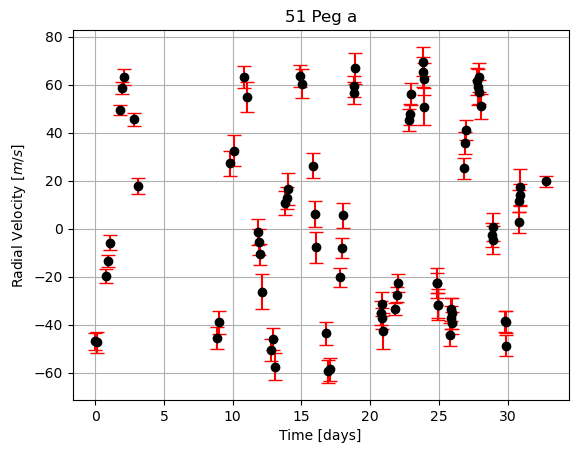

0      0.00000
1      0.15106
2      0.81822
3      0.92392
4      1.09204
        ...   
77    30.79857
78    30.84397
79    30.88947
80    30.92437
81    32.78827
Name: JD, Length: 82, dtype: float64
Initial guesses for P and K are 4.23 and 55.6 respectively


In [3]:
import pandas as pd
from astropy.time import Time

data = pd.read_csv("51Peg_mayorqueloz95.csv")


data['JD']= data['JD'] -  data['JD'][0]



plt.errorbar(data["JD"], data["vrad"], yerr=data["vrad_uncertainty"], fmt='o', color='black', ecolor='red', capsize=5)

plt.xlabel("Time [days]")
plt.ylabel("Radial Velocity $[m/s]$")  
plt.title("51 Peg a")
plt.savefig("pdf/51Peg.pdf")
plt.grid()
plt.show()

print(data["JD"])

# Initial guesses for P and K
P_guess=4.23
K_guess=55.6
print(f'Initial guesses for P and K are {P_guess} and {K_guess} respectively')




In [4]:
def chi_squared(data, data_uncertainty, model):
    return np.sum(((data - model)/ data_uncertainty)**2)


def vrad(t,P, K, f0, v0):
    return K * np.sin(2 * np.pi * (t/P - f0)) + v0

# As instructed in the exercise.

delta_P = 1
P_values = np.arange(P_guess - delta_P, P_guess + delta_P, 0.01)

delta_K = 10
K_values = np.arange(K_guess - delta_K, K_guess + delta_K, 1)


f0_values = np.arange(0, 1, 0.01)

v0_guess = 0
delta_v0 = 10
v0_values = np.arange(v0_guess - delta_v0, v0_guess + delta_v0, 1)


Searching Periods (P): 100%|██████████| 200/200 [00:51<00:00,  3.85it/s]


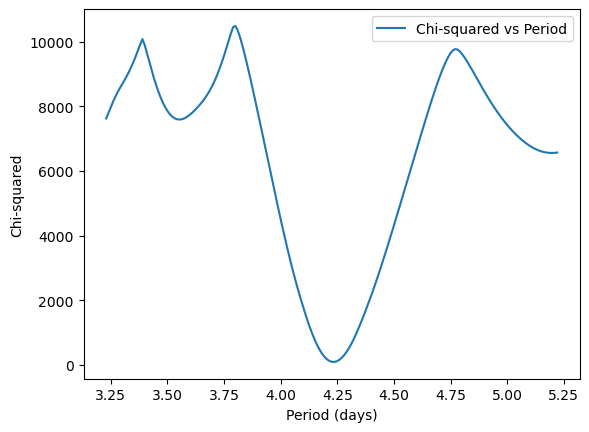

Refining Best Period: 100%|██████████| 200/200 [00:51<00:00,  3.85it/s]


In [ ]:
from tqdm import tqdm

# Extract columns from data for convenience
time = data["JD"].values
vrad_obs = data["vrad"].values
vrad_uncertainty = data["vrad_uncertainty"].values

# Array to store minimum chi-squared values for each P
chi2_min_per_P = []

# Loop over values of P to find the one with the minimum chi-squared
for P in tqdm(P_values, desc="Searching Periods (P)", leave=True):
    chi2_min = float('inf')
    for K in K_values:
        for f0 in f0_values:
            for v0 in v0_values:
                # Calculate the model vrad for current parameters
                model = vrad(time, P, K, f0, v0)
                # Calculate chi-squared for this model
                chi2 = chi_squared(vrad_obs, vrad_uncertainty, model)
                # Check if this chi-squared is the lowest found so far for this P
                if chi2 < chi2_min:
                    chi2_min = chi2
    chi2_min_per_P.append(chi2_min)



# Find the period with the minimum chi-squared value
best_P_index = np.argmin(chi2_min_per_P)
best_P = P_values[best_P_index]

# Refine around best_P by searching in a narrower range
fine_P_values = np.arange(best_P - 0.1, best_P + 0.1, 0.001)
fine_chi2_min_per_P = []
best_K, best_f0, best_v0, min_chi2 = None, None, None, float('inf')

# Refined search with progress bar
for P in tqdm(fine_P_values, desc="Refining Best Period", leave=True):
    for K in K_values:
        for f0 in f0_values:
            for v0 in v0_values:
                model = vrad(time, P, K, f0, v0)
                chi2 = chi_squared(vrad_obs, vrad_uncertainty, model)
                
                if chi2 < min_chi2:
                    min_chi2 = chi2
                    best_P, best_K, best_f0, best_v0 = P, K, f0, v0
    fine_chi2_min_per_P.append(min_chi2)


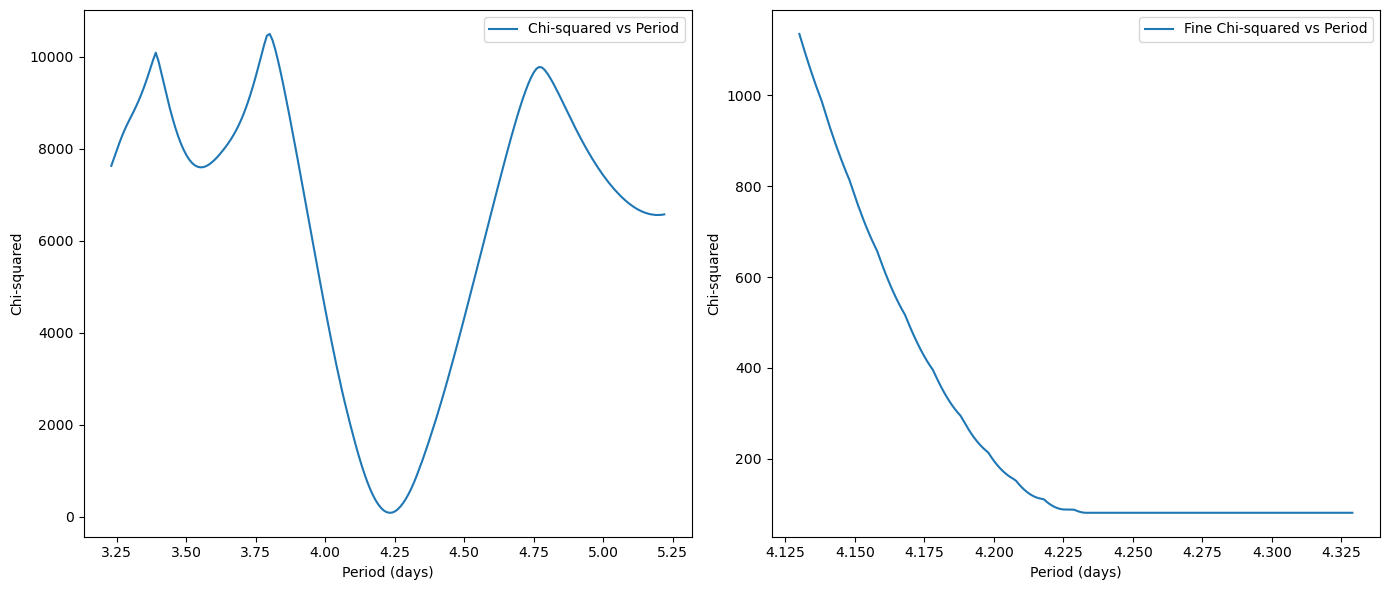

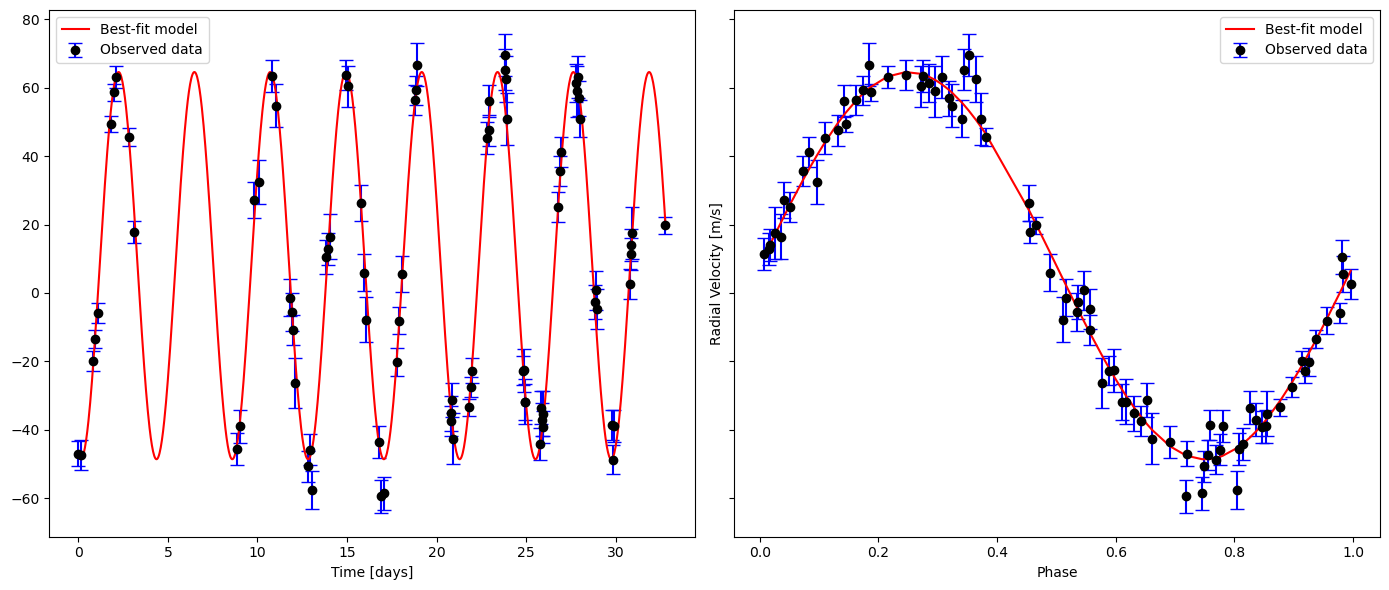

Best-fitting parameters:
Period (P): 4.233000000000014 days
Semi-amplitude (K): 56.6 m/s
Phase offset (f0): 0.28
Systemic velocity (v0): 8 m/s
Minimum Chi-squared: 81.50522781170017


In [42]:

plt.figure(figsize=(14, 6))

# Plot chi-squared as a function of P
plt.subplot(1, 2, 1)
plt.plot(P_values, chi2_min_per_P, label="Chi-squared vs Period")
plt.xlabel("Period (days)")
plt.ylabel("Chi-squared")
plt.legend()

# Plot fine search results for chi-squared vs. period
plt.subplot(1, 2, 2)
plt.plot(fine_P_values, fine_chi2_min_per_P, label="Fine Chi-squared vs Period")
plt.xlabel("Period (days)")
plt.ylabel("Chi-squared")
plt.legend()

plt.tight_layout()
plt.show()


# Final plot: observed vs model
phases = (time / best_P - best_f0) % 1  # Phase folding
best_model = vrad(time, best_P, best_K, best_f0, best_v0)

# Sort phases and corresponding radial velocities
sorted_indices = np.argsort(phases)
sorted_phases = phases[sorted_indices]
sorted_vrad_obs = vrad_obs[sorted_indices]
sorted_best_model = best_model[sorted_indices]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot observed vs model over time
times = np.linspace(time[0], time[-1], 1000)
best_model = vrad(times, best_P, best_K, best_f0, best_v0)
ax1.errorbar(time, vrad_obs, yerr=vrad_uncertainty, label="Observed data", fmt='o', color='black', ecolor='blue', capsize=5)
ax1.plot(times, best_model, label="Best-fit model", color="red")
ax1.set_xlabel("Time [days]")
ax1.legend()

# Plot observed vs model
ax2.errorbar(sorted_phases, sorted_vrad_obs, yerr=vrad_uncertainty[sorted_indices], label="Observed data", fmt='o', color='black', ecolor='blue', capsize=5)
ax2.plot(sorted_phases, sorted_best_model, label="Best-fit model", color="red")
ax2.set_xlabel("Phase")
ax2.set_ylabel("Radial Velocity [m/s]")
ax2.legend()

plt.tight_layout()
plt.show()

# Print best-fitting parameters
print("Best-fitting parameters:")
print(f"Period (P): {best_P} days")
print(f"Semi-amplitude (K): {best_K} m/s")
print(f"Phase offset (f0): {best_f0}")
print(f"Systemic velocity (v0): {best_v0} m/s")
print(f"Minimum Chi-squared: {min_chi2}")


In [45]:
from astropy.constants import G, M_sun, M_jup

def calculate_Mp(M_star, P, i, K):
    """
    Calculate the mass of the planet (M_P) in Jupiter masses using the provided parameters.
    
    Parameters:
    M_star (float): Mass of the star in solar masses (M_sun)
    P (float): Orbital period in days
    i (float): Orbital inclination in degrees
    K (float): Constant (default is 1.0, adjust based on your system)
    
    Returns:
    float: Mass of the planet (M_P) in Jupiter masses
    """
    
    # Convert inclination angle to radians
    i_radians = np.radians(i)
    
    # Gravitational constant G from astropy, in units of m^3 kg^-1 s^-2
    G_value = G.value  # Extract the value of G in SI units (m^3 kg^-1 s^-2)
    
    # Calculate M_P in Jupiter masses (M_J)
    M_P = K * M_star**(2/3) * ((P / (2 * np.pi * G_value))**(1/3)) / np.sin(i_radians)
    
    return M_P

minimal_planet_mass = calculate_Mp(1.06 * M_sun.value, best_P *24*3600, 90, best_K) / M_jup.value
print(minimal_planet_mass)


0.46833689335525774
